# ML class final project part4
##  Almog Shor
## Yehudit Brickner

In [1]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import time
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [2]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression


In [3]:
# function to represent the confusion matrix nicely
def Confusion_Matrix(cf_matrix):
    plt.figure(figsize=(6,6))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')

In [7]:
test_data1 = pd.read_csv('final_test_data_sphere_nonsphere_full.csv')
del test_data1['path']
del test_data1['class_name']
del test_data1['class_number']
# ball_type = [0,2,9,11]
# test_data1 = test_data1.loc[test_data1['class_number'].isin(ball_type)]
test_data1.shape

(632, 160773)

In [27]:
print()

In [28]:


X1 = test_data1.iloc[:, 1:5] # small
X2 = test_data1.iloc[:, 5:5+256*3]  # hist
y = test_data1['type']

d3 = pd.read_csv('df_final_test_2class_X3.csv')
y3 = d3['type']
X3 = d3.drop(['type'], axis=1)

d4 = pd.read_csv('df_final_test_2class_X4.csv')
y4 = d4['type']
X4 = d4.drop(['type'], axis=1)

d5 = pd.read_csv('df_final_test_2class_X5.csv')
y5 = d5['type']
X5 = d5.drop(['type'], axis=1)


In [29]:
X1.head()

,lines?,#lines,circles?,#circles
0,0,0,1,1
1,1,759,1,8
2,1,445,1,10
3,0,0,1,4
4,1,27,1,2


In [30]:
X2.head()

,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,...,b246,b247,b248,b249,b250,b251,b252,b253,b254,b255
0,0,0,0,0,0,0,0,0,0,0,...,10,16,14,25,37,73,87,155,629,27273
1,182,184,170,223,353,223,280,179,181,200,...,99,116,144,141,172,230,204,276,372,430
2,0,0,0,0,0,1,3,0,0,2,...,241,258,265,265,240,230,239,236,336,9865
3,0,0,0,0,0,0,0,0,0,2,...,54,54,66,65,112,134,138,178,292,23978
4,1,10,12,31,31,35,64,83,106,165,...,858,1060,1261,1633,1444,1202,1048,842,791,525


In [31]:
X3.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-13979.792731,-11248.729636,-7863.240588,3197.540573,-3345.502310,-9933.722422,429.664606,-5572.663262,2257.766739,479.756997,...,-608.155394,368.651239,119.738212,-70.978500,173.746383,-349.054160,-355.500765,617.979914,-9.312689,-27.453007
1,24755.915676,-119.080584,-4196.587277,675.300322,3774.189785,-3392.014072,3002.301903,-3643.601767,1385.296068,1966.851372,...,-912.089986,-89.690468,209.352610,425.956345,-82.529497,193.721611,-470.201582,332.436788,-337.402279,15.307489
2,-1280.260296,-11482.533235,-3142.908781,-699.958549,-841.922242,1557.624872,-2011.171030,-485.314558,-25.725517,1922.073872,...,-280.516600,436.460875,-272.881191,-27.254789,254.494905,-314.025858,-100.198351,442.069814,213.603946,568.118022
3,-12892.030969,-12172.026435,-8418.860992,7762.083029,-356.394314,-3778.901946,-1959.452067,1152.078587,-1668.904006,-693.265970,...,0.519837,-417.171520,13.089076,-10.984548,-348.879483,-175.560784,643.451598,102.763313,-152.579448,335.434894
4,7049.231476,-14838.363084,-1794.084049,-46.689486,1959.732074,477.119624,-3784.739070,-3401.408884,-1303.468757,7514.471585,...,287.169866,-145.552038,-765.019993,588.518629,-355.607398,1364.351082,-730.358540,-532.548881,667.590601,609.640309


In [32]:
X4.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-3237.424523,41.021040,427.020571,400.475205,1438.251793,386.480744,892.431676,686.806373,-512.254583,-288.342434,...,-78.187743,-220.174187,170.285191,50.202307,24.643266,93.398118,-18.349983,6.278355,-85.819851,-21.551653
1,3092.383563,-1110.047075,-1672.188137,1093.137500,-239.899141,-123.749537,-526.523040,-422.104367,-173.015046,19.252758,...,-243.203437,-24.499866,-137.101820,14.543100,249.222455,-216.295420,-150.320481,-112.865412,-36.054609,-93.578466
2,1215.701668,1433.177605,-333.915426,250.951261,1001.832154,115.135642,-1043.126271,172.652581,-381.376050,-1218.081811,...,94.170669,-19.497106,-117.175295,255.442121,-186.894280,-29.989681,107.271296,-2.473641,-8.446058,193.321132
3,-2791.648470,198.560860,-463.481513,63.309704,972.896231,161.269204,292.973564,1149.945814,-712.545723,211.406542,...,-71.563085,93.329500,103.397365,-125.882832,77.826568,-8.692424,-9.234717,106.024065,55.107242,19.052904
4,-1050.302983,-1103.089497,-1022.326034,-880.152115,-566.388628,1352.089798,-1057.437686,534.621844,-496.200992,166.139789,...,-72.769269,60.083945,-3.405301,123.312301,-195.603169,-3.171387,132.441227,21.040915,-96.737678,242.616614


In [33]:
X5.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-31464.646918,-14888.252078,-9584.967171,904.919300,7604.539186,2046.949504,188.664942,-10776.964019,913.724691,-367.945150,...,-88.084741,-403.643714,-94.540090,97.975036,-341.685856,-40.379763,-498.421850,-350.253995,-656.177409,-194.817105
1,29084.163858,-5109.872718,-98.125699,530.597119,3336.960219,-3732.064898,-3636.386949,-3252.859966,171.093706,-2352.623655,...,872.651883,-575.780668,348.129027,26.149686,559.757036,272.312579,-178.314444,-414.378790,-368.009640,356.337251
2,-1668.988843,-1296.506344,-11264.270168,-678.765793,3282.695243,-632.821204,840.044664,1173.545361,-1144.164310,-758.034768,...,1066.354282,-299.499796,215.482034,324.717756,-829.936798,226.573119,271.748546,424.143237,525.845295,49.011526
3,-26908.789760,-12003.238806,-10740.889949,1812.783263,8062.920897,4065.236526,-4621.420026,-5027.612115,-679.727065,-2071.019428,...,-50.350344,3.336489,-337.448281,-419.015660,-29.281929,504.692997,-253.585701,333.530897,797.016812,-312.637280
4,15194.648499,5206.112512,-15696.626777,113.510273,2354.656831,-1097.795778,-1713.697843,858.666057,861.782613,-645.409749,...,535.284287,-408.440896,779.498622,745.364265,-613.814519,-207.745561,90.831060,577.096444,888.644921,-216.990526


In [34]:
results=[]

In [35]:
svm1 = pickle.load(open('svm1_2class.sav', 'rb'))
neigh1 = pickle.load(open('knn1_2class.sav', 'rb'))
ada1 = pickle.load(open('ada1_2class.sav', 'rb'))
RF1 = pickle.load(open('RF1_2class.sav', 'rb'))
LR1 = pickle.load(open('LR1_2class.sav', 'rb'))


svm2 = pickle.load(open('svm2_2class.sav', 'rb'))
neigh2 = pickle.load(open('knn2_2class.sav', 'rb'))
ada2 = pickle.load(open('ada2_2class.sav', 'rb'))
RF2= pickle.load(open('RF2_2class.sav', 'rb'))
LR2 = pickle.load(open('LR2_2class.sav', 'rb'))


svm3 = pickle.load(open('svm3_2class.sav', 'rb'))
neigh3 = pickle.load(open('knn3_2class.sav', 'rb'))
ada3 = pickle.load(open('ada3_2class.sav', 'rb'))
RF3 = pickle.load(open('RF3_2class.sav', 'rb'))
LR3 = pickle.load(open('LR3_2class.sav', 'rb'))


svm4 = pickle.load(open('svm4_2class.sav', 'rb'))
neigh4 = pickle.load(open('knn4_2class.sav', 'rb'))
ada4 = pickle.load(open('ada4_2class.sav', 'rb'))
RF4 = pickle.load(open('RF4_2class.sav', 'rb'))
LR4 = pickle.load(open('LR4_2class.sav', 'rb'))


svm5 = pickle.load(open('svm5_2class.sav', 'rb'))
neigh5 = pickle.load(open('knn5_2class.sav', 'rb'))
ada5 = pickle.load(open('ada5_2class.sav', 'rb'))
RF5 = pickle.load(open('RF5_2class.sav', 'rb'))
LR5 = pickle.load(open('LR5_2class.sav', 'rb'))



# svm6 = pickle.load(open('svm6.sav', 'rb'))
# neigh6 = pickle.load(open('knn6.sav', 'rb'))
# ada6 = pickle.load(open('ada6.sav', 'rb'))
# RF6 = pickle.load(open('RF6.sav', 'rb'))
# LR6 = pickle.load(open('LR6.sav', 'rb'))


# svm7 = pickle.load(open('svm7.sav', 'rb'))
# neigh7 = pickle.load(open('knn7.sav', 'rb'))
# ada7 = pickle.load(open('ada7.sav', 'rb'))
# RF7 = pickle.load(open('RF7.sav', 'rb'))
# LR7 = pickle.load(open('LR7.sav', 'rb'))


# svm8 = pickle.load(open('svm8.sav', 'rb'))
# neigh8 = pickle.load(open('knn8.sav', 'rb'))
# ada8 = pickle.load(open('ada8.sav', 'rb'))
# RF8 = pickle.load(open('RF8.sav', 'rb'))
# LR8 = pickle.load(open('LR8.sav', 'rb'))


# svm9 = pickle.load(open('svm9.sav', 'rb'))
# neigh9 = pickle.load(open('knn9.sav', 'rb'))
# ada9 = pickle.load(open('ada9.sav', 'rb'))
# RF9 = pickle.load(open('RF9.sav', 'rb'))
# LR9 = pickle.load(open('LR9.sav', 'rb'))

SVM
              precision    recall  f1-score   support

           0       0.61      0.81      0.69       334
           1       0.66      0.42      0.52       298

    accuracy                           0.62       632
   macro avg       0.63      0.61      0.60       632
weighted avg       0.63      0.62      0.61       632

62.5 %

KNN
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       334
           1       0.60      0.51      0.55       298

    accuracy                           0.61       632
   macro avg       0.61      0.61      0.60       632
weighted avg       0.61      0.61      0.61       632

61.08 %

Adaboost
              precision    recall  f1-score   support

           0       0.65      0.68      0.66       334
           1       0.62      0.59      0.60       298

    accuracy                           0.63       632
   macro avg       0.63      0.63      0.63       632
weighted avg       0.63      0.63      0

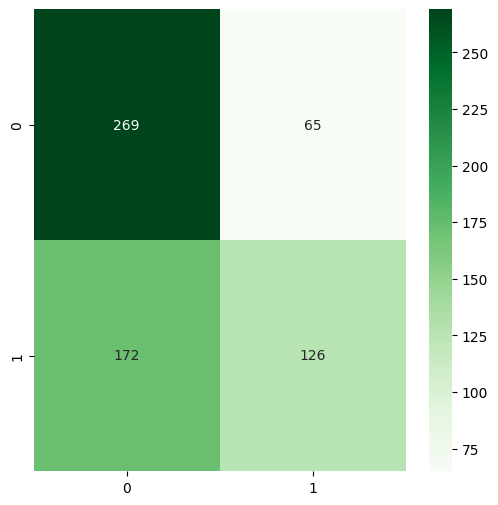

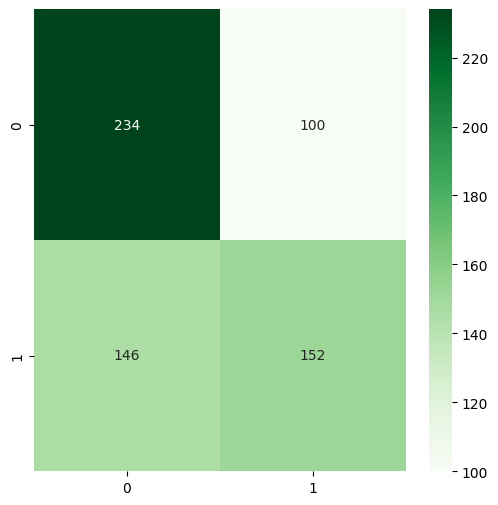

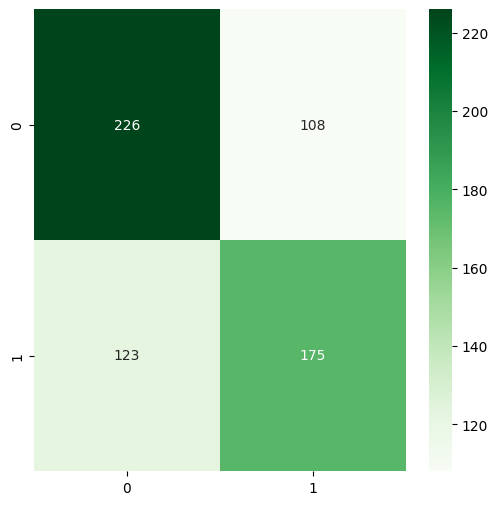

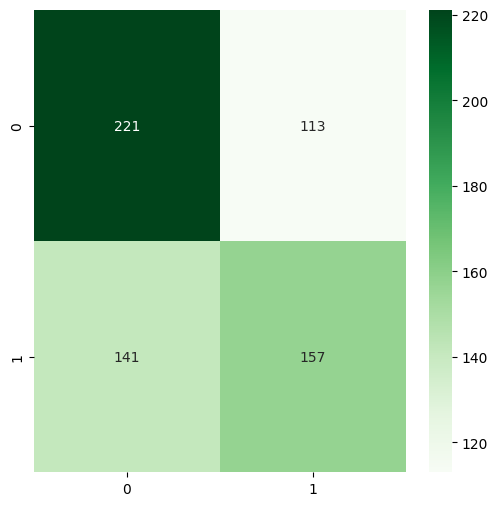

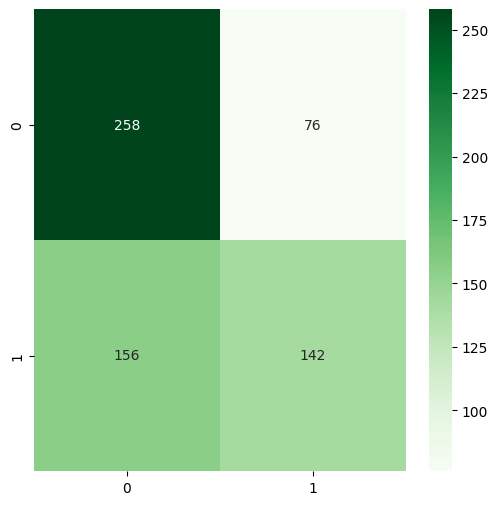

In [36]:
print("SVM")
pred_svm = svm1.predict(X1)
Confusion_Matrix(confusion_matrix(y,pred_svm))
print(classification_report(y, pred_svm))
print(round(np.sum([y==pred_svm])/len(y),4)*100,"%")
results.append(['lines and circles', 'SVM',round(np.sum([y==pred_svm])/len(y),4)*100])

print('\nKNN')
pred_knn = neigh1.predict(X1)
Confusion_Matrix(confusion_matrix(y,pred_knn))
print(classification_report(y, pred_knn))
print(round(np.sum([y==pred_knn])/len(y),4)*100,"%")
results.append(['lines and circles', 'KNN',round(np.sum([y==pred_knn])/len(y),4)*100])

print('\nAdaboost')
pred_ada = ada1.predict(X1)
Confusion_Matrix(confusion_matrix(y,pred_ada))
print(classification_report(y, pred_ada))
print(round(np.sum([y==pred_ada])/len(y),4)*100,"%")
results.append(['lines and circles', 'Adaboost',round(np.sum([y==pred_ada])/len(y),4)*100])


print('\nRandom Forest')
pred_rf = RF1.predict(X1)
Confusion_Matrix(confusion_matrix(y,pred_rf))
print(classification_report(y, pred_rf))
print(round(np.sum([y==pred_rf])/len(y),4)*100,"%")
results.append(['lines and circles', 'Random Forest',round(np.sum([y==pred_rf])/len(y),4)*100])


print("\nLogistic Regression")
pred_lr = LR1.predict(X1)
Confusion_Matrix(confusion_matrix(y,pred_lr))
print(classification_report(y, pred_lr))
print(round(np.sum([y==pred_lr])/len(y),4)*100,"%")
results.append(['lines and circles', 'Logistic Regression',round(np.sum([y==pred_lr])/len(y),4)*100])


SVM
              precision    recall  f1-score   support

           0       0.61      0.50      0.55       334
           1       0.54      0.65      0.59       298

    accuracy                           0.57       632
   macro avg       0.58      0.57      0.57       632
weighted avg       0.58      0.57      0.57       632

56.96 %

KNN
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       334
           1       0.66      0.56      0.61       298

    accuracy                           0.66       632
   macro avg       0.66      0.65      0.65       632
weighted avg       0.66      0.66      0.66       632

65.98 %

Adaboost
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       334
           1       0.70      0.64      0.67       298

    accuracy                           0.70       632
   macro avg       0.70      0.70      0.70       632
weighted avg       0.70      0.70      

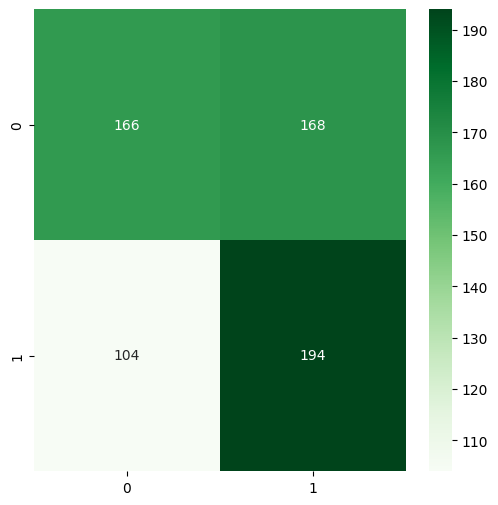

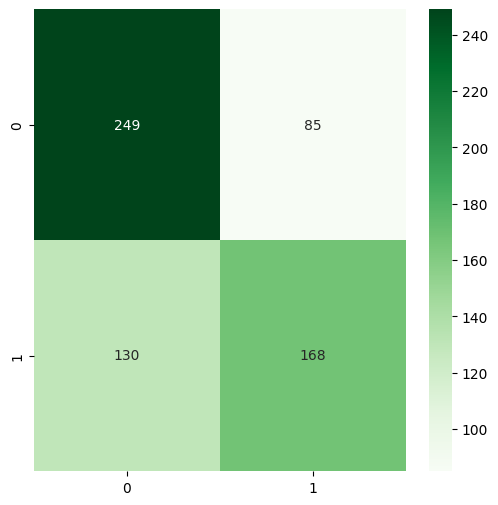

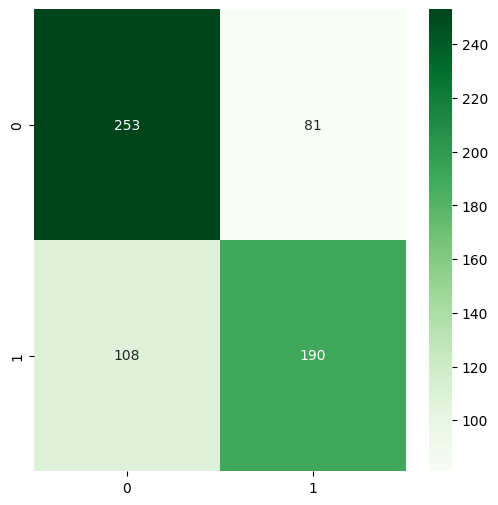

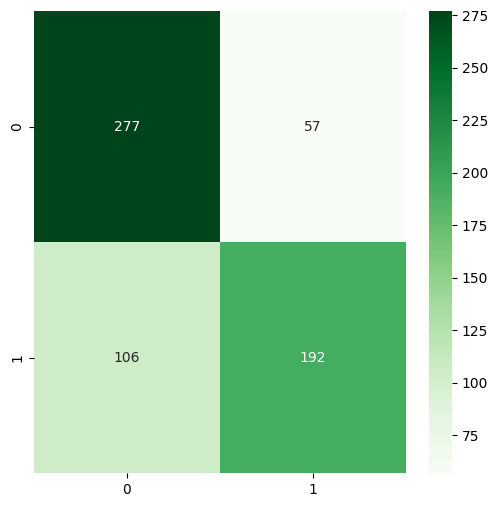

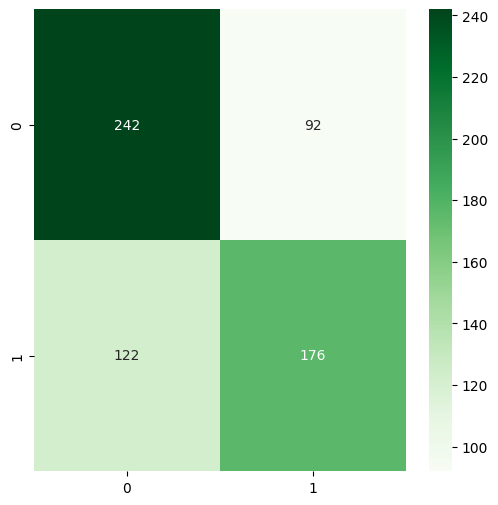

In [37]:
print("SVM")
pred_svm = svm2.predict(X2)
Confusion_Matrix(confusion_matrix(y,pred_svm))
print(classification_report(y, pred_svm))
print(round(np.sum([y==pred_svm])/len(y),4)*100,"%")
results.append(['histogram', 'SVM',round(np.sum([y==pred_svm])/len(y),4)*100])

print('\nKNN')
pred_knn = neigh2.predict(X2)
Confusion_Matrix(confusion_matrix(y,pred_knn))
print(classification_report(y, pred_knn))
print(round(np.sum([y==pred_knn])/len(y),4)*100,"%")
results.append(['histogram', 'KNN',round(np.sum([y==pred_knn])/len(y),4)*100])

print('\nAdaboost')
pred_ada = ada2.predict(X2)
Confusion_Matrix(confusion_matrix(y,pred_ada))
print(classification_report(y, pred_ada))
print(round(np.sum([y==pred_ada])/len(y),4)*100,"%")
results.append(['histogram', 'Adaboost',round(np.sum([y==pred_ada])/len(y),4)*100])


print('\nRandom Forest')
pred_rf = RF2.predict(X2)
Confusion_Matrix(confusion_matrix(y,pred_rf))
print(classification_report(y, pred_rf))
print(round(np.sum([y==pred_rf])/len(y),4)*100,"%")
results.append(['histogram', 'Random Forest',round(np.sum([y==pred_rf])/len(y),4)*100])


print("\nLogistic Regression")
pred_lr = LR2.predict(X2)
Confusion_Matrix(confusion_matrix(y,pred_lr))
print(classification_report(y, pred_lr))
print(round(np.sum([y==pred_lr])/len(y),4)*100,"%")
results.append(['histogram', 'Logistic Regression',round(np.sum([y==pred_lr])/len(y),4)*100])


SVM
              precision    recall  f1-score   support

           0       0.56      0.53      0.54       334
           1       0.50      0.54      0.52       298

    accuracy                           0.53       632
   macro avg       0.53      0.53      0.53       632
weighted avg       0.53      0.53      0.53       632

53.16 %

KNN
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       334
           1       0.66      0.63      0.65       298

    accuracy                           0.67       632
   macro avg       0.67      0.67      0.67       632
weighted avg       0.67      0.67      0.67       632

67.41 %

Adaboost
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       334
           1       0.66      0.69      0.68       298

    accuracy                           0.69       632
   macro avg       0.69      0.69      0.69       632
weighted avg       0.69      0.69      

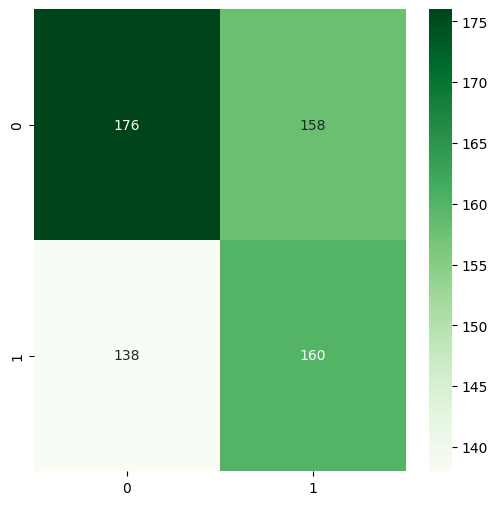

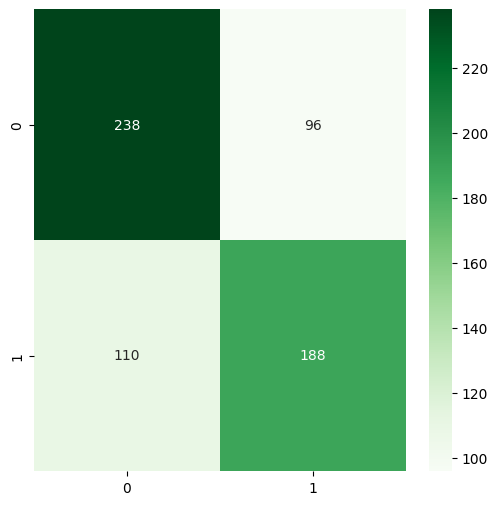

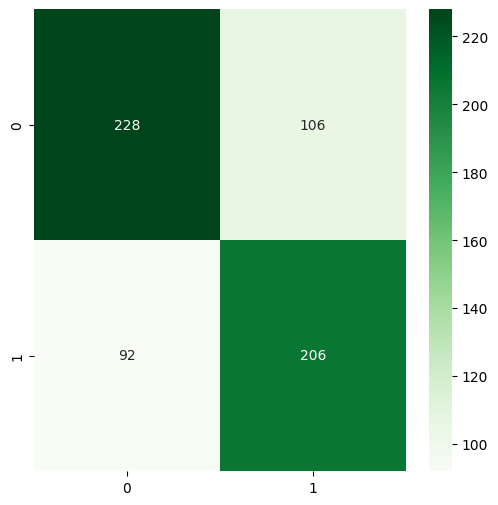

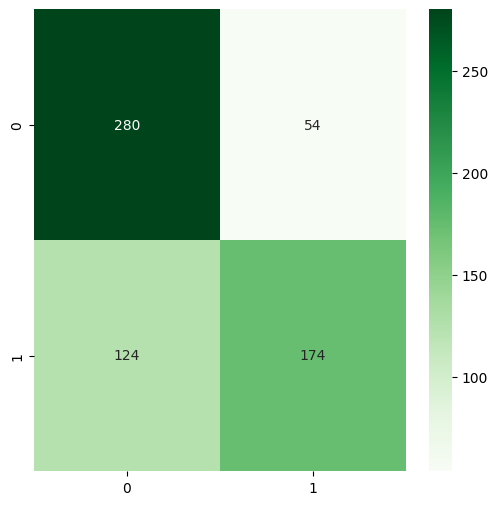

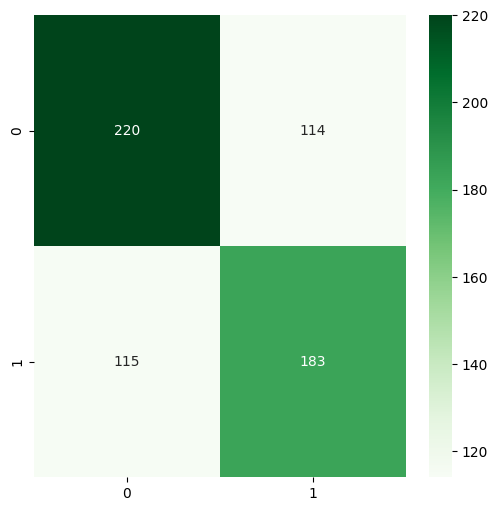

In [38]:
print("SVM")
pred_svm = svm3.predict(X3)
Confusion_Matrix(confusion_matrix(y3,pred_svm))
print(classification_report(y3, pred_svm))
print(round(np.sum([y3==pred_svm])/len(y3),4)*100,"%")
results.append(['image PCA 200', 'SVM',round(np.sum([y3==pred_svm])/len(y3),4)*100])

print('\nKNN')
pred_knn = neigh3.predict(X3)
Confusion_Matrix(confusion_matrix(y3,pred_knn))
print(classification_report(y3, pred_knn))
print(round(np.sum([y3==pred_knn])/len(y3),4)*100,"%")
results.append(['image PCA 200', 'KNN',round(np.sum([y3==pred_knn])/len(y3),4)*100])

print('\nAdaboost')
pred_ada = ada3.predict(X3)
Confusion_Matrix(confusion_matrix(y3,pred_ada))
print(classification_report(y3, pred_ada))
print(round(np.sum([y3==pred_ada])/len(y3),4)*100,"%")
results.append(['image PCA 200', 'Adaboost',round(np.sum([y3==pred_ada])/len(y3),4)*100])


print('\nRandom Forest')
pred_rf = RF3.predict(X3)
Confusion_Matrix(confusion_matrix(y3,pred_rf))
print(classification_report(y3, pred_rf))
print(round(np.sum([y3==pred_rf])/len(y3),4)*100,"%")
results.append(['image PCA 200', 'Random Forest',round(np.sum([y3==pred_rf])/len(y3),4)*100])


print("\nLogistic Regression")
pred_lr = LR3.predict(X3)
Confusion_Matrix(confusion_matrix(y3,pred_lr))
print(classification_report(y3, pred_lr))
print(round(np.sum([y3==pred_lr])/len(y3),4)*100,"%")
results.append(['image PCA 200', 'Logistic Regression',round(np.sum([y3==pred_lr])/len(y3),4)*100])


SVM
              precision    recall  f1-score   support

           0       0.67      0.59      0.63       334
           1       0.60      0.67      0.63       298

    accuracy                           0.63       632
   macro avg       0.63      0.63      0.63       632
weighted avg       0.63      0.63      0.63       632

62.970000000000006 %

KNN
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       334
           1       0.70      0.78      0.74       298

    accuracy                           0.74       632
   macro avg       0.74      0.74      0.74       632
weighted avg       0.74      0.74      0.74       632

73.72999999999999 %

Adaboost
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       334
           1       0.63      0.74      0.68       298

    accuracy                           0.67       632
   macro avg       0.68      0.68      0.67       632
weighted avg  

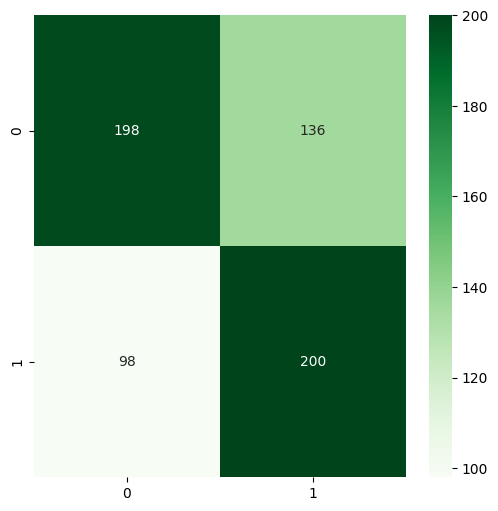

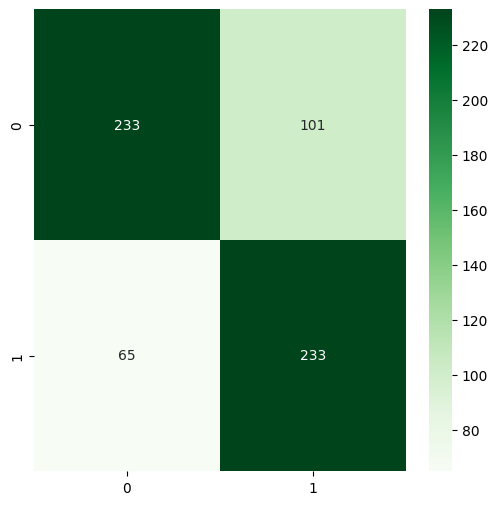

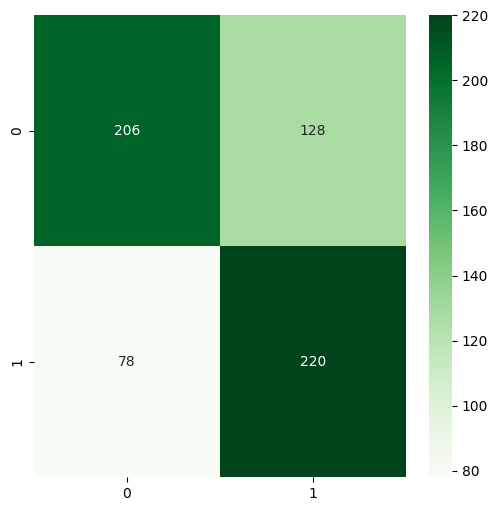

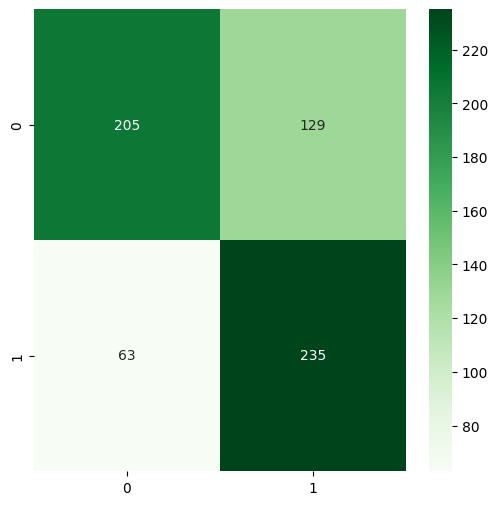

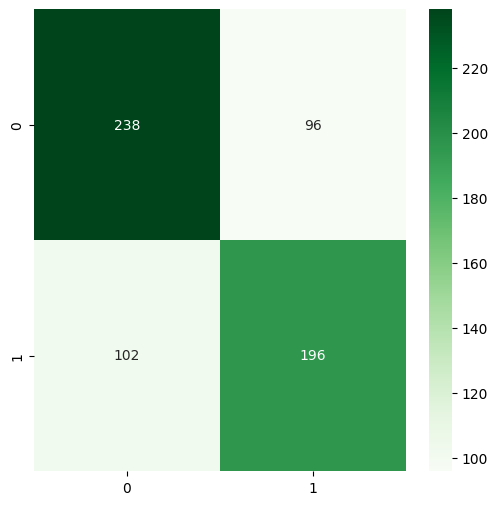

In [39]:
print("SVM")
pred_svm = svm4.predict(X4)
Confusion_Matrix(confusion_matrix(y4,pred_svm))
print(classification_report(y4, pred_svm))
print(round(np.sum([y4==pred_svm])/len(y4),4)*100,"%")
results.append(['edge PCA 100', 'SVM',round(np.sum([y4==pred_svm])/len(y4),4)*100])

print('\nKNN')
pred_knn = neigh4.predict(X4)
Confusion_Matrix(confusion_matrix(y4,pred_knn))
print(classification_report(y4, pred_knn))
print(round(np.sum([y4==pred_knn])/len(y4),4)*100,"%")
results.append(['edge PCA 100', 'KNN',round(np.sum([y4==pred_knn])/len(y4),4)*100])

print('\nAdaboost')
pred_ada = ada4.predict(X4)
Confusion_Matrix(confusion_matrix(y4,pred_ada))
print(classification_report(y4, pred_ada))
print(round(np.sum([y4==pred_ada])/len(y4),4)*100,"%")
results.append(['edge PCA 100', 'Adaboost',round(np.sum([y4==pred_ada])/len(y4),4)*100])


print('\nRandom Forest')
pred_rf = RF4.predict(X4)
Confusion_Matrix(confusion_matrix(y4,pred_rf))
print(classification_report(y4, pred_rf))
print(round(np.sum([y4==pred_rf])/len(y4),4)*100,"%")
results.append(['edge PCA 100', 'Random Forest',round(np.sum([y4==pred_rf])/len(y4),4)*100])


print("\nLogistic Regression")
pred_lr = LR4.predict(X4)
Confusion_Matrix(confusion_matrix(y4,pred_lr))
print(classification_report(y4, pred_lr))
print(round(np.sum([y4==pred_lr])/len(y4),4)*100,"%")
results.append(['edge PCA 100', 'Logistic Regression',round(np.sum([y4==pred_lr])/len(y4),4)*100])


SVM
              precision    recall  f1-score   support

           0       0.64      0.65      0.65       334
           1       0.60      0.59      0.60       298

    accuracy                           0.62       632
   macro avg       0.62      0.62      0.62       632
weighted avg       0.62      0.62      0.62       632

62.339999999999996 %

KNN
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       334
           1       0.69      0.69      0.69       298

    accuracy                           0.71       632
   macro avg       0.71      0.71      0.71       632
weighted avg       0.71      0.71      0.71       632

71.04 %

Adaboost
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       334
           1       0.72      0.70      0.71       298

    accuracy                           0.73       632
   macro avg       0.73      0.73      0.73       632
weighted avg       0.73   

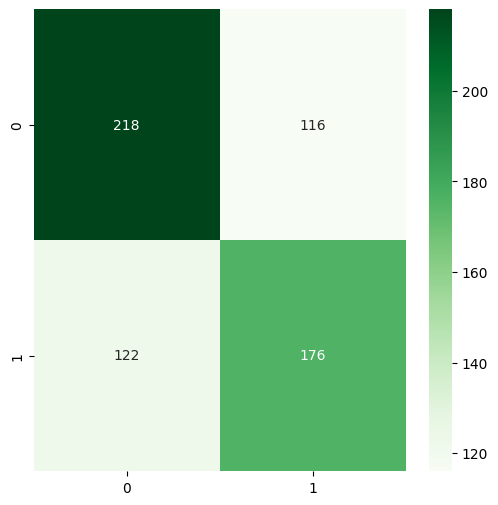

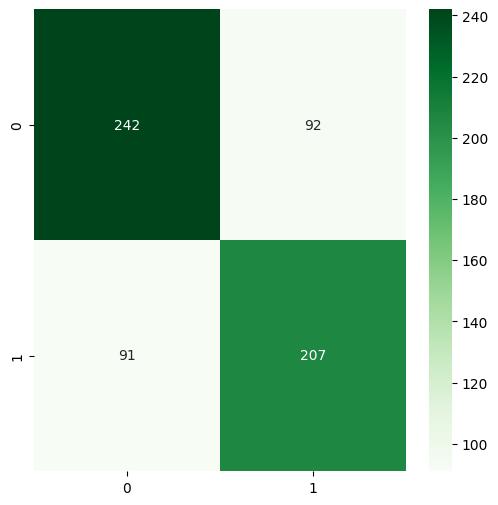

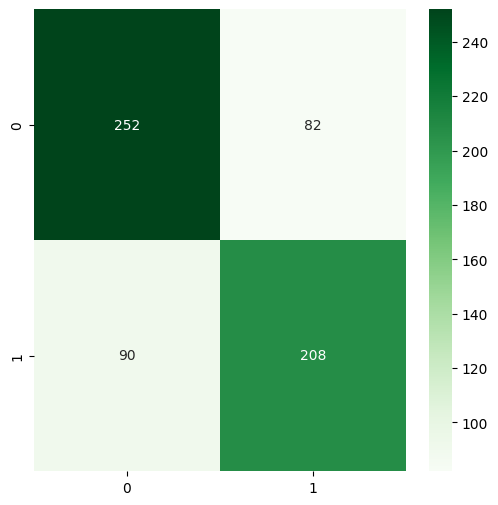

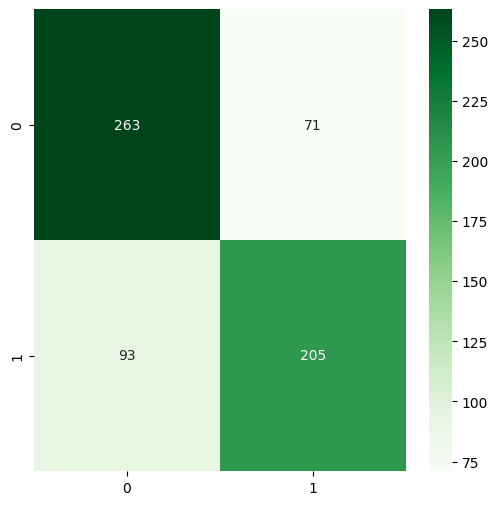

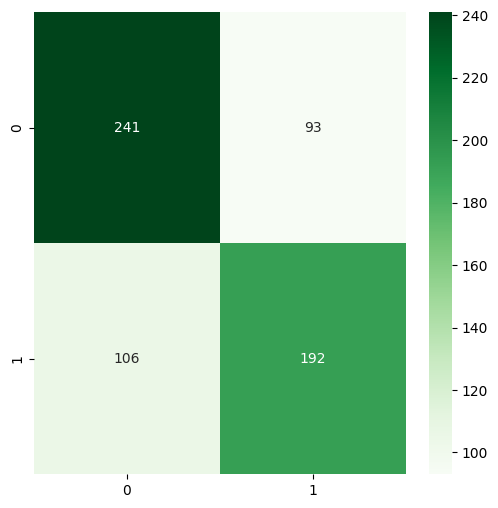

In [40]:
print("SVM")
pred_svm = svm5.predict(X5)
Confusion_Matrix(confusion_matrix(y5,pred_svm))
print(classification_report(y5, pred_svm))
print(round(np.sum([y5==pred_svm])/len(y5),4)*100,"%")
results.append(['all PCA 200', 'SVM',round(np.sum([y5==pred_svm])/len(y5),4)*100])

print('\nKNN')
pred_knn = neigh5.predict(X5)
Confusion_Matrix(confusion_matrix(y5,pred_knn))
print(classification_report(y5, pred_knn))
print(round(np.sum([y5==pred_knn])/len(y5),4)*100,"%")
results.append(['all PCA 200', 'KNN',round(np.sum([y5==pred_knn])/len(y5),4)*100])

print('\nAdaboost')
pred_ada = ada5.predict(X5)
Confusion_Matrix(confusion_matrix(y5,pred_ada))
print(classification_report(y5, pred_ada))
print(round(np.sum([y5==pred_ada])/len(y5),4)*100,"%")
results.append(['all PCA 200', 'Adaboost',round(np.sum([y5==pred_ada])/len(y5),4)*100])


print('\nRandom Forest')
pred_rf = RF5.predict(X5)
Confusion_Matrix(confusion_matrix(y5,pred_rf))
print(classification_report(y5, pred_rf))
print(round(np.sum([y5==pred_rf])/len(y5),4)*100,"%")
results.append(['all PCA 200', 'Random Forest',round(np.sum([y5==pred_rf])/len(y5),4)*100])


print("\nLogistic Regression")
pred_lr = LR5.predict(X5)
Confusion_Matrix(confusion_matrix(y5,pred_lr))
print(classification_report(y5, pred_lr))
print(round(np.sum([y5==pred_lr])/len(y5),4)*100,"%")
results.append(['all PCA 200', 'Logistic Regression',round(np.sum([y5==pred_lr])/len(y5),4)*100])


In [41]:
cols = ["df_type","classifier","accuracy"]
df = pd.DataFrame(results, columns=cols)
df

,df_type,classifier,accuracy
0,lines and circles,SVM,62.50
1,lines and circles,KNN,61.08
2,lines and circles,Adaboost,63.45
3,lines and circles,Random Forest,59.81
4,lines and circles,Logistic Regression,63.29
5,histogram,SVM,56.96
6,histogram,KNN,65.98
7,histogram,Adaboost,70.09
8,histogram,Random Forest,74.21
9,histogram,Logistic Regression,66.14


In [42]:
df2=df.sort_values(by=['classifier','accuracy'])
df2

,df_type,classifier,accuracy
2,lines and circles,Adaboost,63.45
17,edge PCA 100,Adaboost,67.41
12,image PCA 200,Adaboost,68.67
7,histogram,Adaboost,70.09
22,all PCA 200,Adaboost,72.78
1,lines and circles,KNN,61.08
6,histogram,KNN,65.98
11,image PCA 200,KNN,67.41
21,all PCA 200,KNN,71.04
16,edge PCA 100,KNN,73.73


In [43]:
df3=df.sort_values(by=['accuracy'])
df3

,df_type,classifier,accuracy
10,image PCA 200,SVM,53.16
5,histogram,SVM,56.96
3,lines and circles,Random Forest,59.81
1,lines and circles,KNN,61.08
20,all PCA 200,SVM,62.34
0,lines and circles,SVM,62.50
15,edge PCA 100,SVM,62.97
4,lines and circles,Logistic Regression,63.29
2,lines and circles,Adaboost,63.45
14,image PCA 200,Logistic Regression,63.77


In [44]:
df4 = df.sort_values(by=['df_type','accuracy'])
df4

,df_type,classifier,accuracy
20,all PCA 200,SVM,62.34
24,all PCA 200,Logistic Regression,68.51
21,all PCA 200,KNN,71.04
22,all PCA 200,Adaboost,72.78
23,all PCA 200,Random Forest,74.05
15,edge PCA 100,SVM,62.97
17,edge PCA 100,Adaboost,67.41
19,edge PCA 100,Logistic Regression,68.67
18,edge PCA 100,Random Forest,69.62
16,edge PCA 100,KNN,73.73
